In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import datetime
df = pd.read_csv('Final_Clean.csv').drop("Unnamed: 0",axis=1)

In [2]:
df["date"]=pd.to_datetime(df["date"])
df['Market cap'] = df['Market cap'].str[1:]
df['Market cap'] = df['Market cap'].str[1:]
df['Historical average dividend yield'] = df['Historical average dividend yield'].str[:-1].astype(float)
df['Current dividend yield'] = df['Current dividend yield'].str[:-1].astype(float)
df['Market cap'] = df['Market cap'].str.replace(',','', regex=True).astype(int)
df['Average volume'] = df['Average volume'].str.replace(',','', regex=True).astype(int)
nums = df.select_dtypes(include=['float64','int64','datetime64'])
catdf = df.select_dtypes(include='object').copy()
encoder = LabelEncoder()
dfcat = catdf.apply(encoder.fit_transform)
full = pd.concat([nums, dfcat],axis=1)

<Axes: >

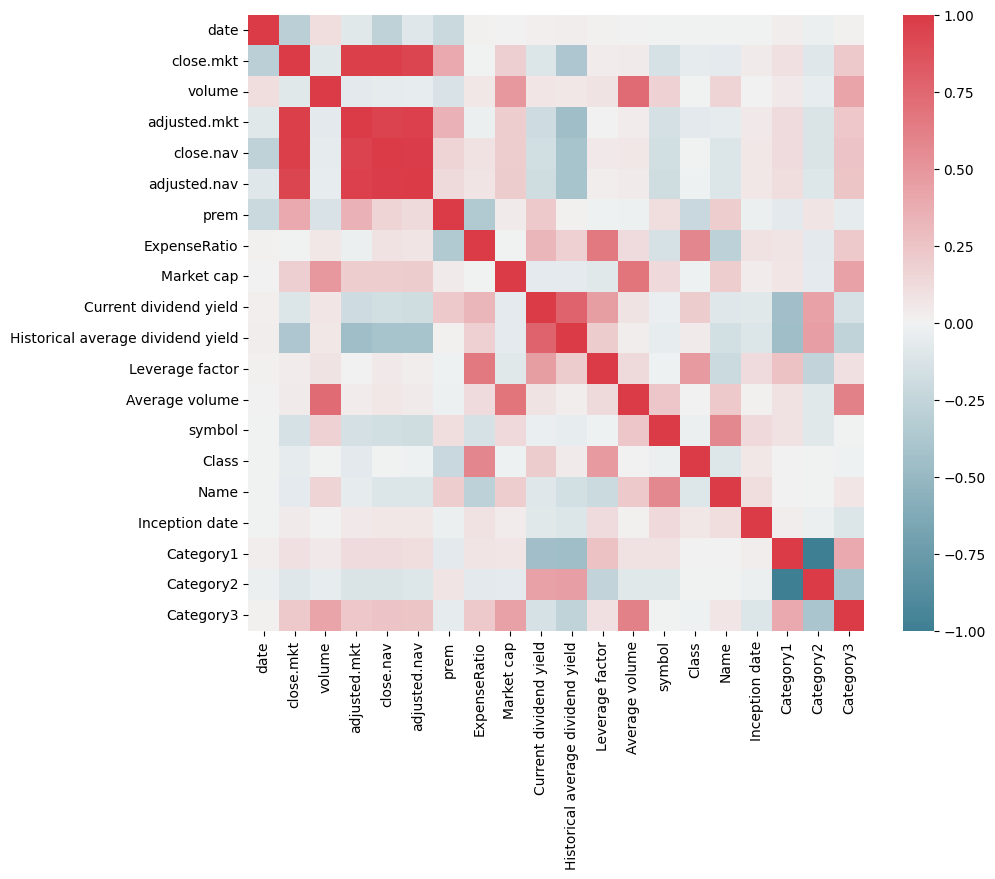

In [3]:
f, ax = plt.subplots(figsize=(10, 8))
corr = full.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [4]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = full.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,date,close.mkt,volume,adjusted.mkt,close.nav,adjusted.nav,prem,ExpenseRatio,Market cap,Current dividend yield,Historical average dividend yield,Leverage factor,Average volume,symbol,Class,Name,Inception date,Category1,Category2,Category3
date,1.000000,-0.300493,0.105291,-0.086489,-0.277314,-0.101300,-0.216800,0.008521,0.005275,0.017818,0.025973,0.011518,0.003418,-0.002151,-0.000804,-0.006522,-0.003972,0.024047,-0.024047,0.011924
close.mkt,-0.300493,1.000000,-0.087948,0.970524,0.969582,0.944708,0.390880,-0.003757,0.192710,-0.112236,-0.377978,0.036852,0.045916,-0.144263,-0.057447,-0.064929,0.042231,0.099445,-0.099445,0.222951
volume,0.105291,-0.087948,1.000000,-0.074469,-0.056047,-0.046963,-0.127653,0.055516,0.490482,0.065244,0.057285,0.079441,0.731282,0.174060,-0.004600,0.159295,0.004164,0.053979,-0.053979,0.424071
adjusted.mkt,-0.086489,0.970524,-0.074469,1.000000,0.948519,0.966005,0.344431,-0.030114,0.200732,-0.189375,-0.457352,0.005472,0.035734,-0.150575,-0.070446,-0.061002,0.047567,0.121613,-0.121613,0.230398
close.nav,-0.277314,0.969582,-0.056047,0.948519,1.000000,0.979859,0.160384,0.087385,0.202417,-0.172325,-0.407627,0.049862,0.059953,-0.174796,-0.005025,-0.116967,0.060256,0.123092,-0.123092,0.253445
adjusted.nav,-0.101300,0.944708,-0.046963,0.966005,0.979859,1.000000,0.128804,0.076655,0.204340,-0.183387,-0.411339,0.024745,0.045756,-0.185387,-0.011623,-0.109806,0.056179,0.104112,-0.104112,0.244229
prem,-0.216800,0.390880,-0.127653,0.344431,0.160384,0.128804,1.000000,-0.352817,0.044247,0.224465,0.008398,-0.011093,-0.017846,0.102130,-0.219102,0.196029,-0.027936,-0.076619,0.076619,-0.061856
ExpenseRatio,0.008521,-0.003757,0.055516,-0.030114,0.087385,0.076655,-0.352817,1.000000,-0.002858,0.326137,0.184462,0.657308,0.117408,-0.142598,0.581619,-0.288190,0.087222,0.076323,-0.076323,0.223667
Market cap,0.005275,0.192710,0.490482,0.200732,0.202417,0.204340,0.044247,-0.002858,1.000000,-0.068217,-0.064451,-0.087505,0.684622,0.134265,-0.009898,0.197086,0.032168,0.069153,-0.069153,0.441329
Current dividend yield,0.017818,-0.112236,0.065244,-0.189375,-0.172325,-0.183387,0.224465,0.326137,-0.068217,1.000000,0.778250,0.455244,0.080854,-0.036316,0.203695,-0.094744,-0.087174,-0.441217,0.441217,-0.141292


In [5]:
filter = full.loc[(full["Category3"] == 2)]

In [14]:
filter = full.loc[(full["symbol"] == 0) | (full["symbol"] == 34) | (full["symbol"] == 38)]

In [15]:
cefs = filter.groupby("symbol")

In [13]:
cefs["prem"].unique()

symbol
0     [-13.2538591373568, -13.6554611045459, -13.665...
8     [-11.5412707971889, -11.644828634995, -11.7261...
14    [-4.18718475894965, -4.95583102612459, -3.9744...
34    [-13.8700962636808, -13.6026963358485, -13.611...
38    [-13.7336080231325, -13.6675870016552, -13.676...
44    [-10.0190287350469, -10.4731909219834, -10.170...
46    [-10.7862297859314, -10.4139692930442, -10.550...
Name: prem, dtype: object

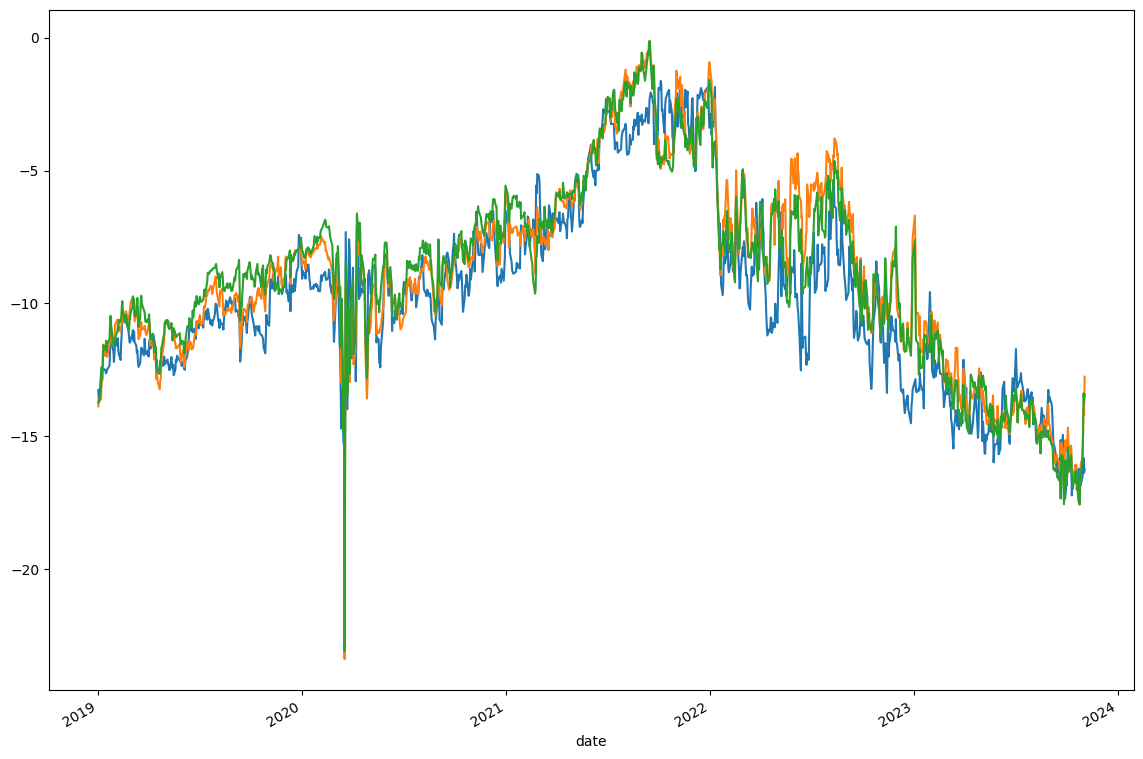

In [37]:
fig, ax = plt.subplots(figsize=(14,10))
cefs.plot(kind = 'line', x = 'date', y = 'prem', ax=ax)
ax.get_legend().remove()
plt.show()

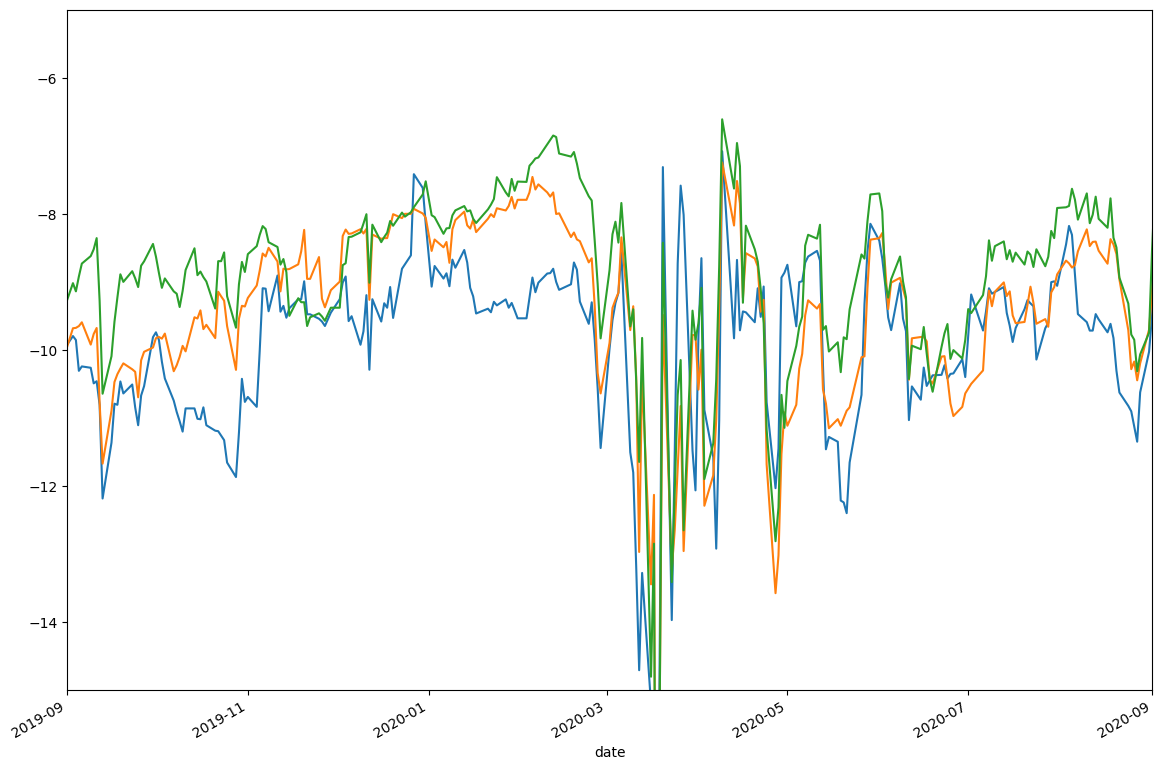

In [48]:
fig, ax = plt.subplots(figsize=(14,10))
cefs.plot(kind = 'line', x = 'date', y = 'prem', ax=ax)
ax.get_legend().remove()
plt.xlim(datetime.date(2019,9,1), datetime.date(2020,9,1))
plt.ylim(-15,-5)
plt.show()

In [8]:
full["Category3"].unique()

array([2, 1, 0])

<Axes: >

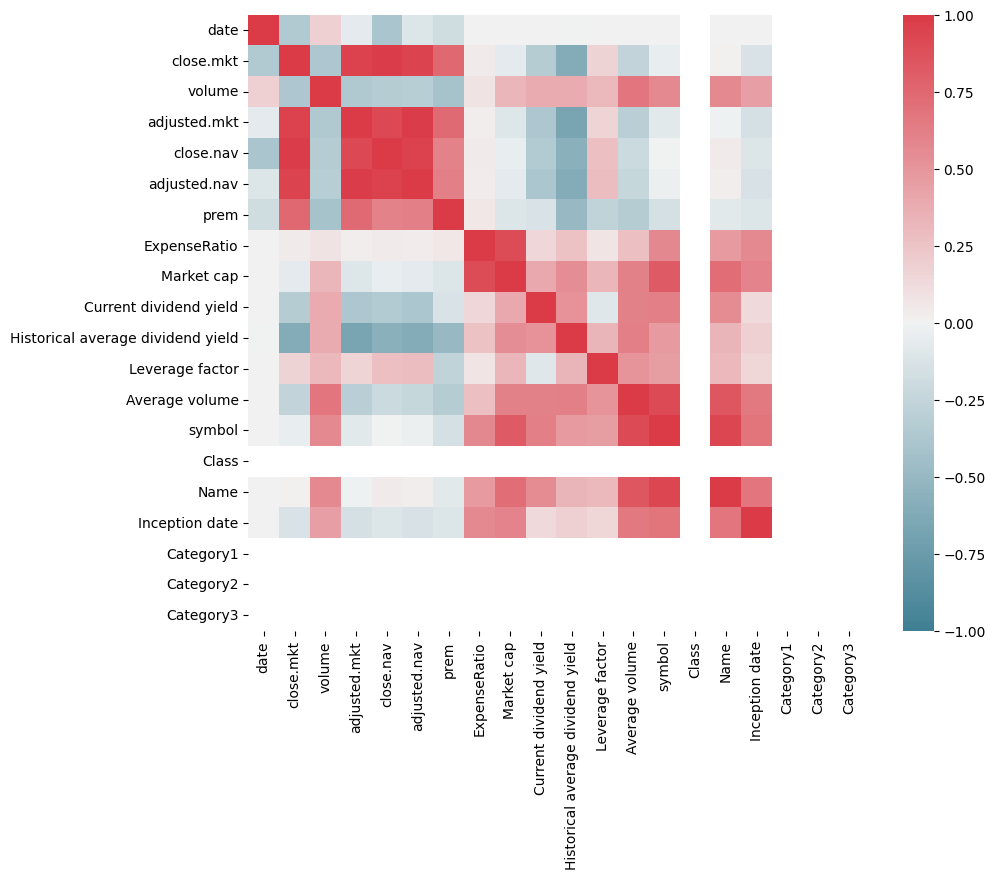

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
corr = filter.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [ ]:
filter.plot(kind = 'scatter', x = 'Historical average dividend yield', y = 'close.mkt',logx=True)
plt.show()